# ImageOverlay

It may happen that you want to draw an image on you map. Here are example on how to do that.


## Using an image from disk

If you have a static image file on your disk, you can simply draw it on the map.

In [1]:
import os
import folium

m = folium.Map([37, 0], zoom_start=1)
merc = os.path.join("data", "Mercator_projection_SW.png")


if not os.path.isfile(merc):
    print(f"Could not find {merc}")
else:
    img = folium.raster_layers.ImageOverlay(
        name="Mercator projection SW",
        image=merc,
        bounds=[[-82, -180], [82, 180]],
        opacity=0.6,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )

    folium.Popup("I am an image").add_to(img)

    img.add_to(m)
    folium.LayerControl().add_to(m)

m

Could not find data/Mercator_projection_SW.png


A few remarks:

* Note that your image has to be in Mercator projection format.

  The image we've used is based on https://en.wikipedia.org/wiki/File:Mercator_projection_SW.jpg ; that you can find in wikipedia's article on Mercator Projection (https://en.wikipedia.org/wiki/Mercator_projection).


You can also provide simply URL. In this case, the image will not be embedded in folium's output.

In [2]:
m = folium.Map([37, 0], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image="https://upload.wikimedia.org/wikipedia/commons/f/f4/Mercator_projection_SW.jpg",
    name="I am a jpeg",
    bounds=[[-82, -180], [82, 180]],
    opacity=1,
    interactive=False,
    cross_origin=False,
    zindex=1,
    alt="Wikipedia File:Mercator projection SW.jpg",
).add_to(m)

folium.LayerControl().add_to(m)


m

This works exactly the same way if you want to put a JPG instead of a PNG.


## Creating an image with numpy

Now you may wish to create your own image, based on another python computation.
For this, you'll need to have numpy installed on your machine.

Let's create an image to draw a rectangle in the bounds `[[0, -60], [60, 60]]`.

In [3]:
import numpy as np

image = np.zeros((61, 61))
image[0, :] = 1.0
image[60, :] = 1.0
image[:, 0] = 1.0
image[:, 60] = 1.0

We can draw it on the map in using:


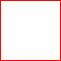

In [4]:
m = folium.Map([37, 0], zoom_start=2)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    colormap=lambda x: (1, 0, 0, x),
).add_to(m)

m

Note that you need to provide a colormap of the form `lambda x: (R,G,B,A)` where `R,G,B,A` are floats between 0 and 1.

Now, let's try to add a line at latitude 45°, and add a polyline to verify it's well rendered.  We'll need to specify `origin='lower` to inform folium that the first lines of the array are to be plotted at the bottom of the image (see `numpy.imshow`, it's the same principle).

In [5]:
import numpy as np

image = np.zeros((61, 1))

image[45, :] = 1.0


m = folium.Map([37, 0], zoom_start=3)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    colormap=lambda x: (1, 0, 0, x),
    origin="lower",
).add_to(m)

folium.PolyLine([[45, -60], [45, 60]]).add_to(m)

m

But even with `origin='lower'`, the red line is not at the good latitude. This is due to Mercator projection used in Leaflet (and most other map systems).

You can read wikipedia's article on Mercator Projection (https://en.wikipedia.org/wiki/Mercator_projection), or simply let folium do the job, in precising that you want the mercator stuff to be handled.

In [6]:
m = folium.Map([37, 0], zoom_start=3)

folium.PolyLine([[45, -60], [45, 60]]).add_to(m)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    origin="lower",
    colormap=lambda x: (1, 0, 0, x),
    mercator_project=True,
).add_to(m)

m

This time, the lines are properly positioned (at the precision of the array).